# regression intro

In [1]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
import sklearn
from sklearn import preprocessing, model_selection, svm #from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle


In [2]:
style.use('ggplot') 
# look descent

In [50]:
df=quandl.get('WIKI/GOOGL')

In [51]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [52]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [53]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [54]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100

In [55]:
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [56]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [57]:
forecast_col='Adj. Close'
df.fillna(-99999, inplace=True) #fill NA with specific value

In [58]:
forecast_out = int(math.ceil(0.1*len(df))) #round upt to nearest whole

In [69]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [70]:
X=np.array(df.drop(['label'],1))
y=np.array(df['label'])

In [71]:
X=preprocessing.scale(X)
X_lately = X[-forecast_out:]# for forecasting
X = X[:-forecast_out]


In [72]:
#X = X[:-forecast_out+1]
df.dropna(inplace=True)
y=np.array(df['label'])

In [73]:
print(len(X),len(y))

3081 3081


In [74]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2) 
#split with 0.8/0.2

In [75]:
clf = LinearRegression()
clf.fit(X_train, y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
#pickle save linear regression
#pickle_in = open('linearregression.pickle', 'rb')
#clf = pickle.load(pickle_in)
#accuracy = clf.score(X_test, y_test)
#accuracy

In [ ]:
clf2 = svm.SVR()
clf2.fit(X_train, y_train)
accuracy2 = clf2.score(X_test, y_test)
accuracy2

In [76]:
forecast_set = clf.predict(X_lately)

In [77]:
df['Forecast']=np.nan

In [78]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

loc gets rows (or columns) with particular labels from the index.

iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

In [79]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] 
    # in:[np.nan for _ in range(6)] out:[nan, nan, nan, nan, nan, nan]

<IPython.core.display.Javascript object>


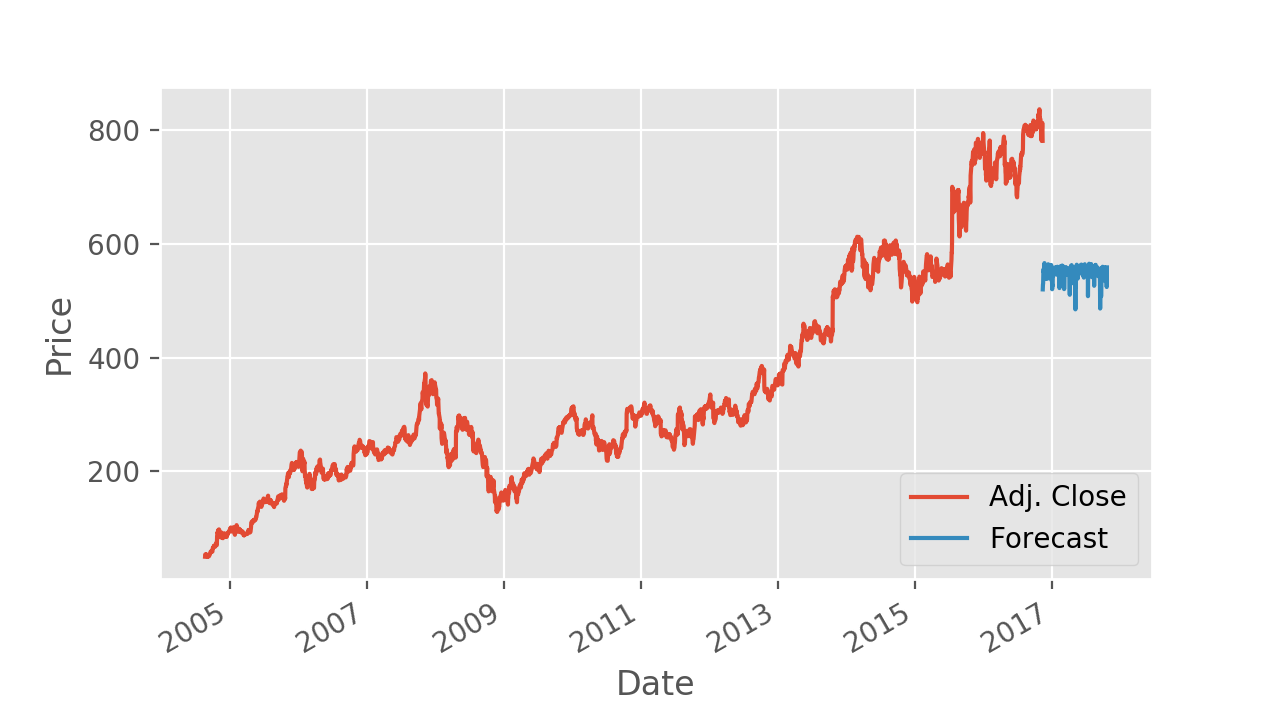

In [80]:
%matplotlib notebook
#plt.figure(figsize=(12,12))
df['Adj. Close'].plot()
df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

In [ ]:
forecast_set

In [ ]:
#pd.set_option('display.max_rows', None)
#df

In [ ]:
df.tail()

## pickling

serializaion of any Python object

In [ ]:
import pickle